**HOUSING: PRICE PREDICTION**

By: **HARSH NEMA**

Batch: **Internship 33**

**Problem Statement:**

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

**Business Goal:**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns # For Purpose of Visualization
import matplotlib.pyplot as plt # Plotting Package
import warnings 
warnings.filterwarnings('ignore') # Filtering warnings
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
# Importing housing train dataset csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


* **MSSubClass:** Identifies the type of dwelling involved in the sale.

* **MSZoning:** Identifies the general zoning classification of the sale.

* **LotFrontage:** Linear feet of street connected to property

* **LotArea:** Lot size in square feet

* **Street:** Type of road access to property

* **Alley:** Type of alley access to property

* **LotShape:** General shape of property

* **LandContour:** Flatness of the property

* **Utilities:** Type of utilities available

* **LotConfig:** Lot configuration

* **LandSlope:** Slope of property

* **Neighborhood:** Physical locations within Ames city limits

* **Condition1:** Proximity to various conditions

* **Condition2:** Proximity to various conditions (if more than one is present)

* **BldgType:** Type of dwelling

* **HouseStyle:** Style of dwelling

* **OverallQual:** Rates the overall material and finish of the house

* **OverallCond:** Rates the overall condition of the house

* **YearBuilt:** Original construction date

* **YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)

* **RoofStyle:** Type of roof

* **RoofMatl:** Roof material

* **Exterior1st:** Exterior covering on house

* **Exterior2nd:** Exterior covering on house (if more than one material)

* **MasVnrType:** Masonry veneer type

* **MasVnrArea:** Masonry veneer area in square feet

* **ExterQual:** Evaluates the quality of the material on the exterior 

* **ExterCond:** Evaluates the present condition of the material on the exterior

* **Foundation:** Type of foundation

* **BsmtQual:** Evaluates the height of the basement

* **BsmtCond:** Evaluates the general condition of the basement

* **BsmtExposure:** Refers to walkout or garden level walls

* **BsmtFinType1:** Rating of basement finished area

* **BsmtFinSF1:** Type 1 finished square feet

* **BsmtFinType2:** Rating of basement finished area (if multiple types)

* **BsmtFinSF2:** Type 2 finished square feet

* **BsmtUnfSF:** Unfinished square feet of basement area

* **TotalBsmtSF:** Total square feet of basement area

* **Heating:** Type of heating

* **HeatingQC:** Heating quality and condition

* **CentralAir:** Central air conditioning

* **Electrical:** Electrical system

* **1stFlrSF:** First Floor square feet
 
* **2ndFlrSF:** Second floor square feet

* **LowQualFinSF:** Low quality finished square feet (all floors)

* **GrLivArea:** Above grade (ground) living area square feet

* **BsmtFullBath:** Basement full bathrooms

* **BsmtHalfBath:** Basement half bathrooms

* **FullBath:** Full bathrooms above grade

* **HalfBath:** Half baths above grade

* **Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)

* **Kitchen:** Kitchens above grade

* **KitchenQual:** Kitchen quality

* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

* **Functional:** Home functionality (Assume typical unless deductions are warranted)

* **Fireplaces:** Number of fireplaces

* **FireplaceQu:** Fireplace quality

* **GarageType:** Garage location

* **GarageYrBlt:** Year garage was built
		
* **GarageFinish:** Interior finish of the garage

* **GarageCars:** Size of garage in car capacity

* **GarageArea:** Size of garage in square feet

* **GarageQual:** Garage quality

* **GarageCond:** Garage condition

* **PavedDrive:** Paved driveway

* **WoodDeckSF:** Wood deck area in square feet

* **OpenPorchSF:** Open porch area in square feet

* **EnclosedPorch:** Enclosed porch area in square feet

* **3SsnPorch:** Three season porch area in square feet

* **ScreenPorch:** Screen porch area in square feet

* **PoolArea:** Pool area in square feet

* **PoolQC:** Pool quality

* **Fence:** Fence quality

* **MiscFeature:** Miscellaneous feature not covered in other categories

* **MiscVal:** $Value of miscellaneous feature

* **MoSold:** Month Sold (MM)

* **YrSold:** Year Sold (YYYY)

* **SaleType:** Type of sale

* **SaleCondition:** Condition of sale



In [ ]:
print("\033[1m" + 'Number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given dataset:
1168
Number of columns in the given dataset:


81

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1161
MiscFeature      1124
Alley            1091
Fence             931
FireplaceQu       551
LotFrontage       214
GarageYrBlt        64
GarageFinish       64
GarageType         64
GarageQual         64
GarageCond         64
BsmtExposure       31
BsmtFinType2       31
BsmtQual           30
BsmtCond           30
BsmtFinType1       30
MasVnrType          7
MasVnrArea          7
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
TotRmsAbvGrd        0
GarageCars          0
LowQualFinSF        0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
GrLivArea           0
HeatingQC 

*Lot of missing values in the dataset, need to do the imputation of missing values*

**Imputation of Missing Values**

**1. PoolQC - 1161 missing values**

**2. MiscFeature - 1124 missing values**

**3. Alley - 1091 missing values**

**4. Fence - 931 missing values**

**More than 80% values are missing in the above four columns so it is better to drop these features**

In [6]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [7]:
# Seperating numeerical and categorial variables where missing values are present
catg_missing = ['FireplaceQu','GarageFinish','GarageType','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual', 
                'BsmtCond','BsmtFinType1','MasVnrType']
num_missing = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [8]:
# Imputation of missing values for categorical variables
for i in df[catg_missing]:
  df[i] = df[i].fillna(df[i].mode()[0])

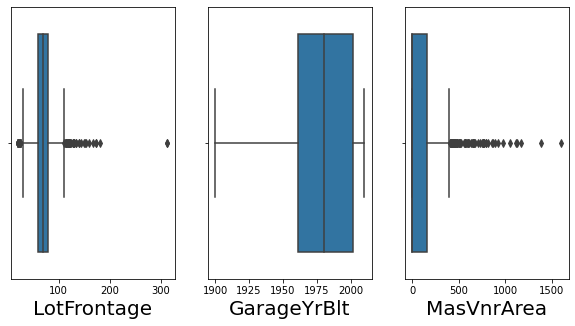

In [ ]:
# Checking outliers in numerical variables (num_missing)
plot=1
plt.figure(figsize=(10,5))
for i in df[num_missing]:
  if plot<=3:
    ax = plt.subplot(1,3,plot)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=20)
  plot+=1
plt.show()

* *Outliers present in **LotFrontage** and **MasVnrArea** and hence imputation of mising values will be done using **Median** strategy*

* **GarageYrBlt** *doesn't have outliers nd hence imputation will be done by **Mean** strategy*

* *This is beacause **Mean** is sensitive to* **outliers** 

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [10]:
df.isnull().sum().sort_values(ascending=False)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
TotalBsmtSF      0
Utilities        0
LandContour      0
LotShape    

**Now no missing values present in the given training dataset**

*Good to proced further*

In [11]:
# Seperating columns according to datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'G

In [35]:
# Seperating numerical and categorical variables

num = ['Id', 'MSSubClass', 'LotFrontage','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
       'MasVnrArea', 'GarageYrBlt', 'SalePrice']

catg = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
        'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.500000,1079.50,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1168.0,70.807363,22.440317,21.0,60.00,70.000000,79.25,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.500000,11515.50,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.000000,7.00,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.000000,2000.00,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.000000,2004.00,2010.0
MasVnrArea,1168.0,101.696918,182.218483,0.0,0.00,0.000000,160.00,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.500000,714.50,5644.0


* *Outliers present in some of the features and it is evident by seeing 75% and max values*

* *The oldest house was built in 1875 and the latest built was in 2010*

* *Min Sale Price is 34900 and max slae price is 755000 in Australian currency*

* *Avg sale price is 181477 and median is 163995 in Australian currency*

In [ ]:
df[catg].describe().T

,count,unique,top,freq
MSZoning,1168,5,RL,928
Street,1168,2,Pave,1164
LotShape,1168,4,Reg,740
LandContour,1168,4,Lvl,1046
Utilities,1168,1,AllPub,1168
LotConfig,1168,5,Inside,842
LandSlope,1168,3,Gtl,1105
Neighborhood,1168,25,NAmes,182
Condition1,1168,9,Norm,1005
Condition2,1168,8,Norm,1154


* *Almost **80% of the houses** belongs to **Residential Low Density** as far as zoning classification of the sale is considered*

* *99.6% of streets belongs to Pavel category (Type of road access to property)*

* **Utilities** *feature has a single unique value for all the observation and hence this feature can be dropped for further analysis*

* *More than 70% of Lot configuration belongs to Inside Lot*

* *Almost 95% property has* **Gentle slope**

* *Around 85% of Building type belongs to* **Single-family Detached**

* **Gas Forced air heating** *is a way a cooling or heating system distributes air throughout a home or a structure and majority of the houses in Australia has this heating system*

**Data Cleaning on Test Dataset**

In [12]:
# Reading the test dataset
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [13]:
# Importing housing test dataset csv file
import io
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [14]:
print("Number of rows in test dataset:",df_test.shape[0])
print("Number of columns in test dataset:",df_test.shape[1])

Number of rows in test dataset: 292
Number of columns in test dataset: 80


In [ ]:
df_test.isnull().sum().sort_values(ascending= False)

PoolQC           292
MiscFeature      282
Alley            278
Fence            248
FireplaceQu      139
LotFrontage       45
GarageType        17
GarageYrBlt       17
GarageQual        17
GarageCond        17
GarageFinish      17
BsmtCond           7
BsmtFinType2       7
BsmtFinType1       7
BsmtQual           7
BsmtExposure       7
MasVnrArea         1
MasVnrType         1
Electrical         1
HalfBath           0
BsmtFullBath       0
BsmtHalfBath       0
BedroomAbvGr       0
FullBath           0
TotRmsAbvGrd       0
Functional         0
KitchenAbvGr       0
KitchenQual        0
Id                 0
Fireplaces         0
LowQualFinSF       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
LandSlope    

*More than 85% of values are missing in* **PoolQC,Alley,MiscFeature and Fence** *so it will be better to drop these features from test dataset as well*

In [15]:
df_test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [16]:
# Seperating numeerical and categorial variables where missing values are present for test dataset
catg_test_missing = ['FireplaceQu','GarageFinish','GarageType','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtQual', 
                'BsmtCond','BsmtFinType1','MasVnrType','Electrical']
num_test_missing = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [17]:
# Imputation of missing values for categorical variables for test dataset
for i in df_test[catg_test_missing]:
  df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

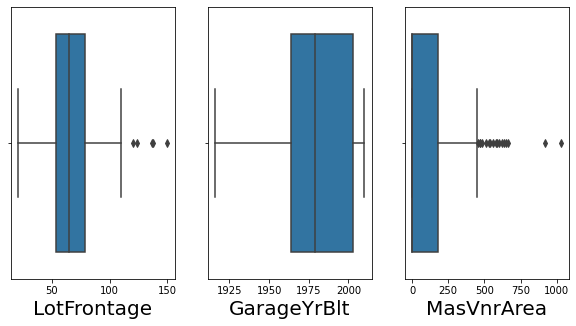

In [ ]:
# Checking outliers in numerical variables (num_test_missing)
plot=1
plt.figure(figsize=(10,5))
for i in df_test[num_test_missing]:
  if plot<=3:
    ax = plt.subplot(1,3,plot)
    sns.boxplot(df_test[i])
    plt.xlabel(i,fontsize=20)
  plot+=1
plt.show()

In [18]:
# Imputation of numerical variable using Median and Mean
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())


In [19]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

**No missing values in the test dataset**

**EXPLORATORY DATA ANALYSIS (EDA)**

**1. UNIVARIATE ANALYSIS**

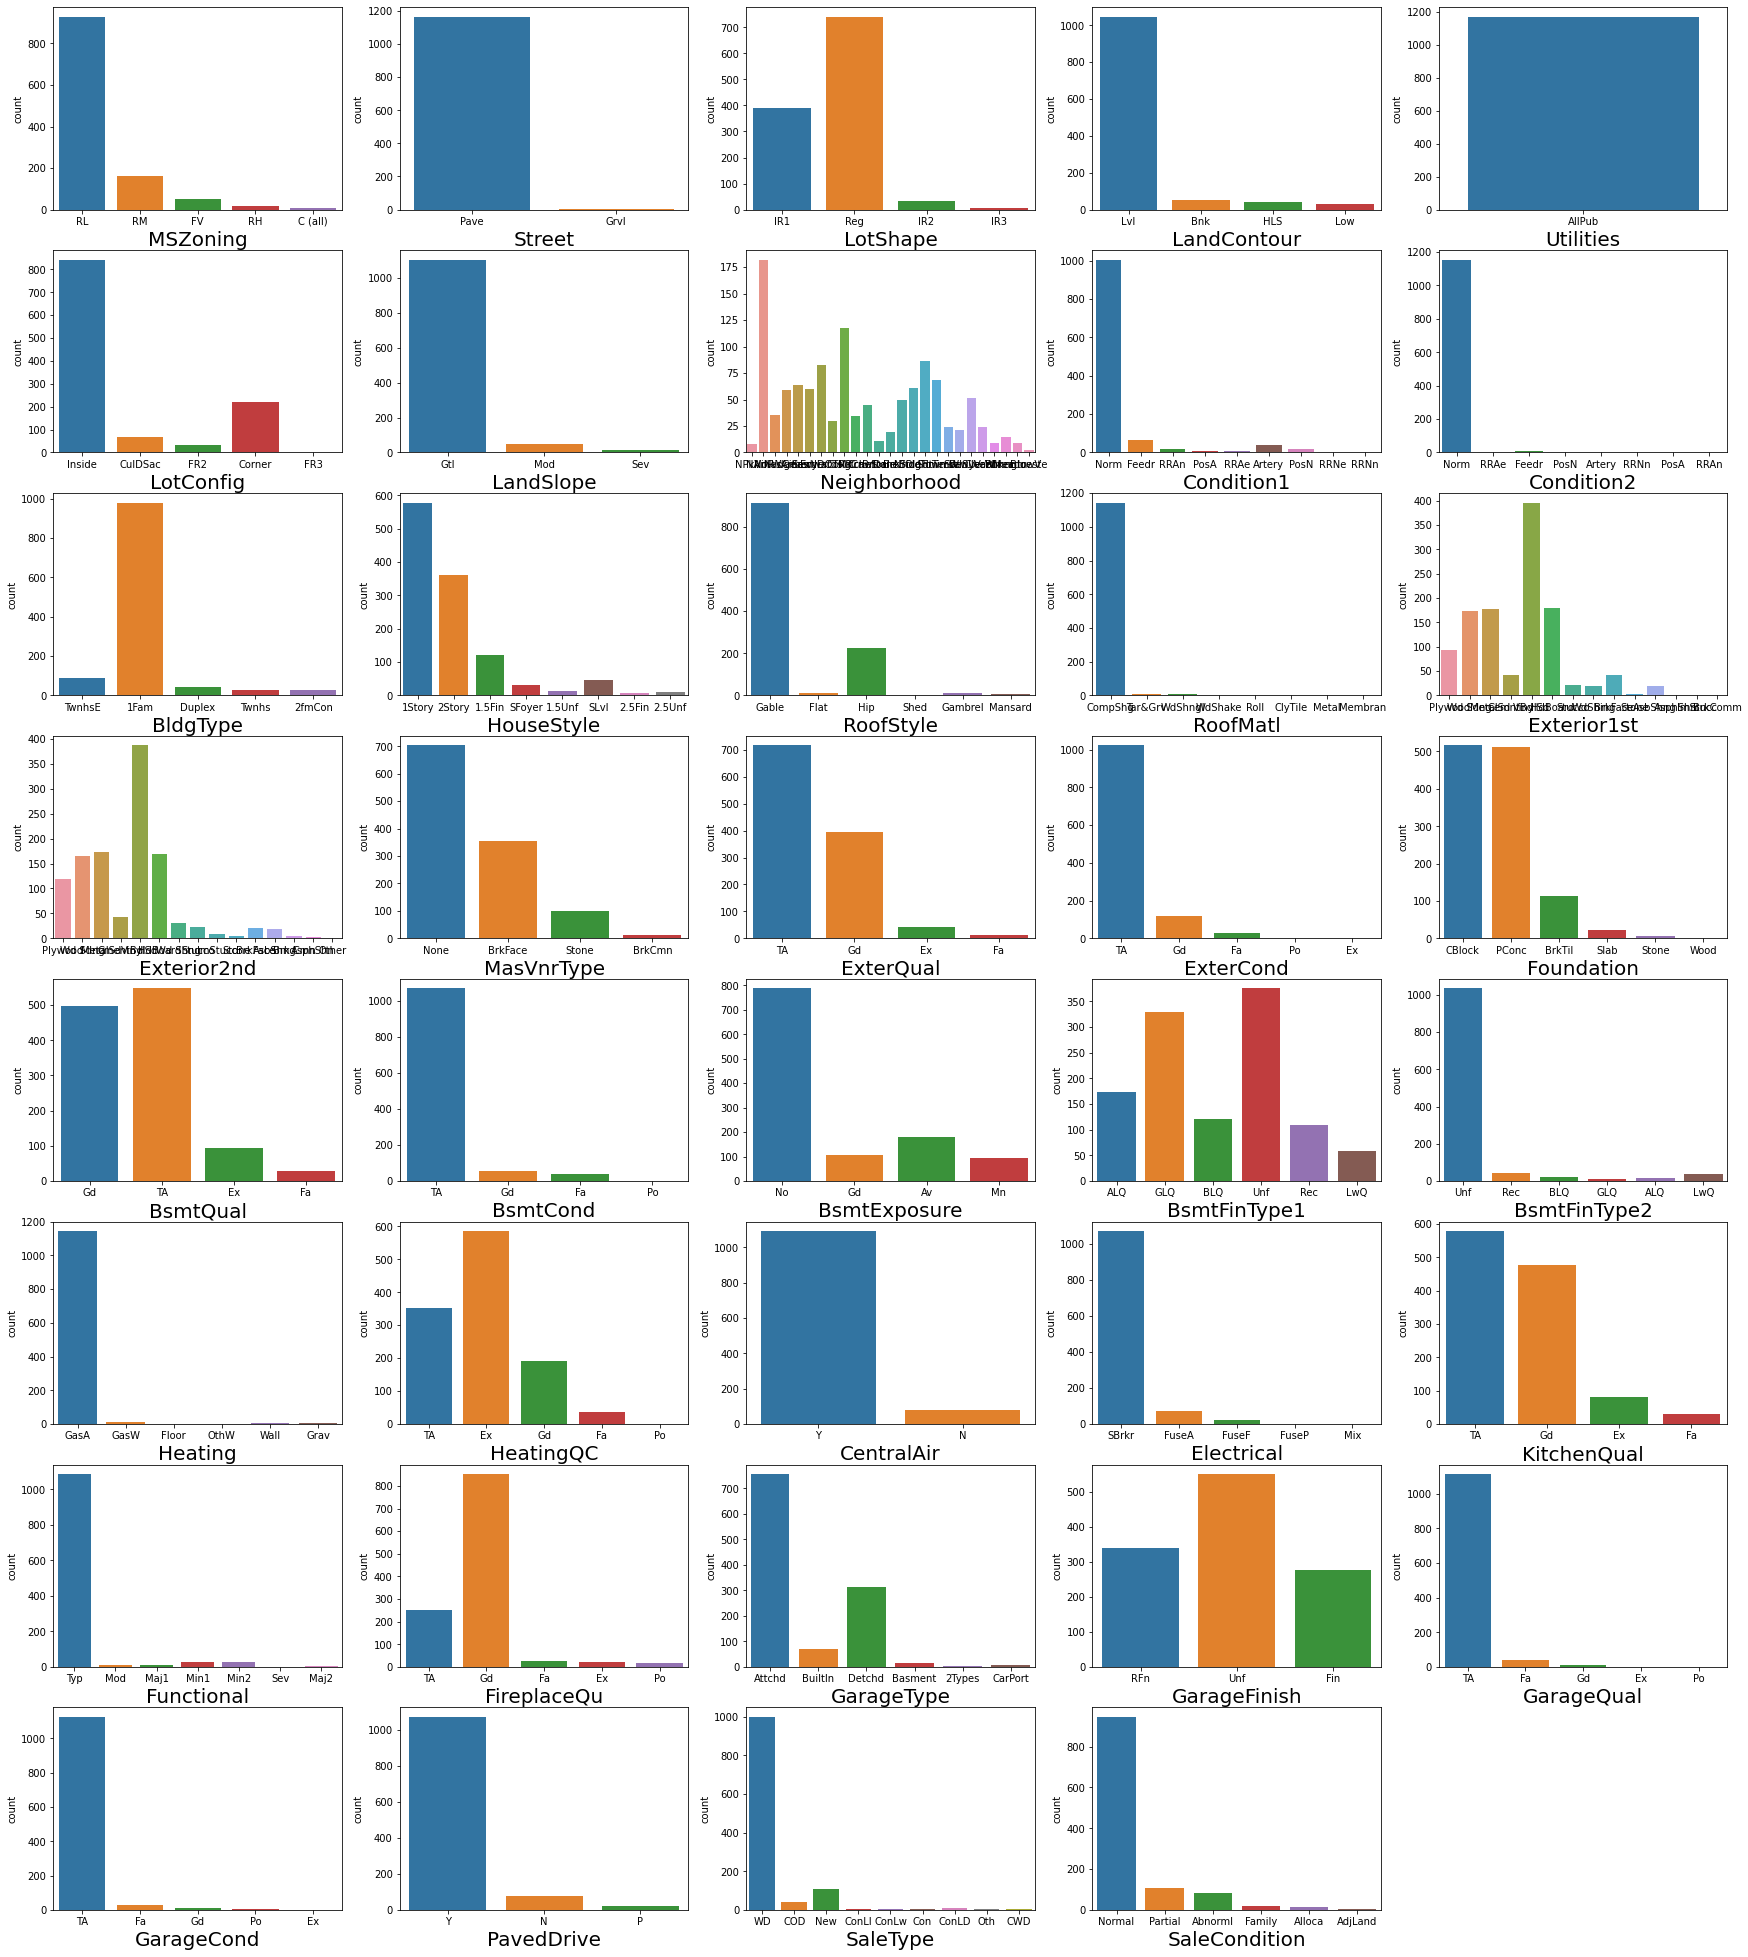

In [ ]:
plt.figure(figsize=(30,35),facecolor='w')
plotnumber=1
for column in catg:
    if plotnumber<=39:
        ax = plt.subplot(8,5,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

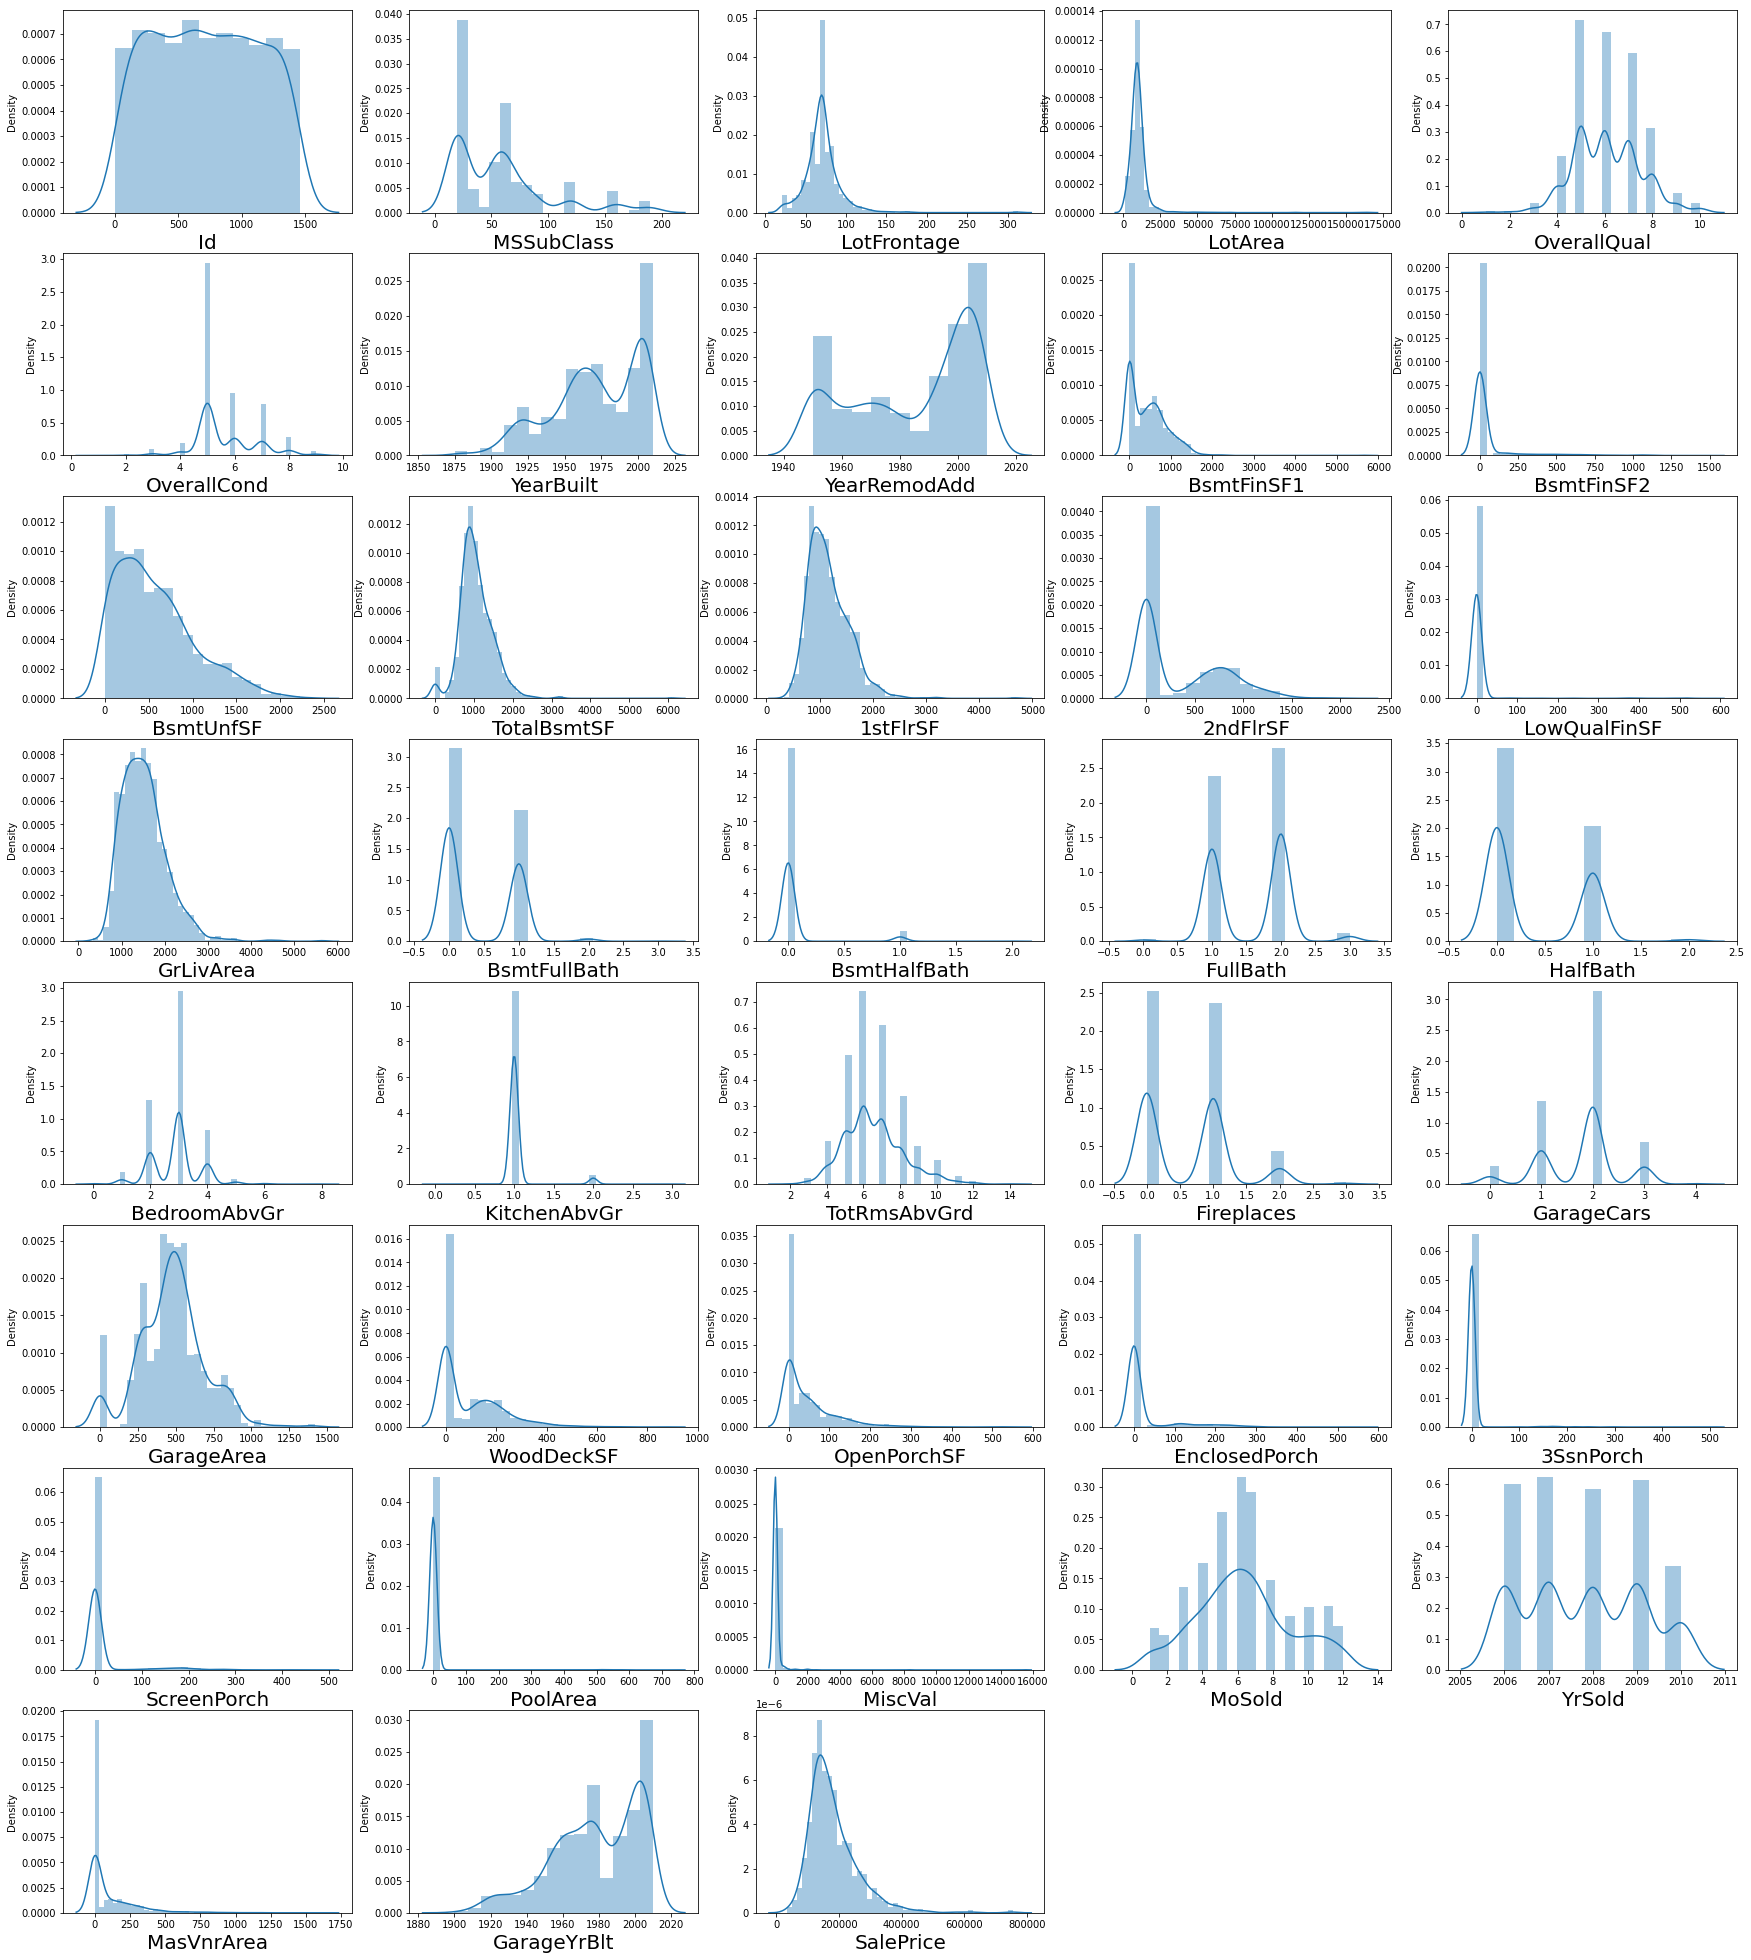

In [ ]:
# CHECKING DATA DISTRIBUTION FOR NUMERICAL VARIABLES
plt.figure(figsize=(30,35),facecolor='w')
plotnumber=1
for column in num:
    if plotnumber<=38:
        ax = plt.subplot(8,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* **Skewness** *can be seen in most of the variables either positive skewed or negatively skewed*

* **Target variable - Sale Price** *has some skewness too on the right hand side*

In [ ]:
df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

**Skewness** *permissible limit is +/- 0.5*

*Features above permissible limit:*

* *MSSubClass*
* *LotFrontage*
* *LotArea*
* *OverallCond*
* *YearBuilt*
and many more

* *Need to reduce the skewness using some transformation techniques*

**2. MULTIVARIATE ANALYSIS**

**(a)How Quality & Area of house affect Pricing?**

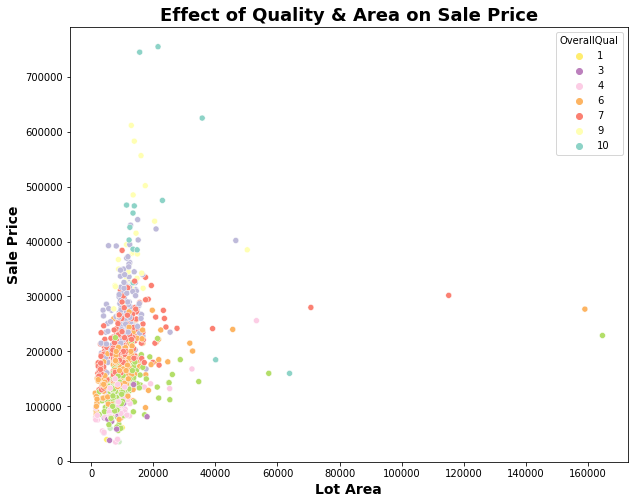

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['LotArea'], df['SalePrice'], hue=df['OverallQual'], palette = 'Set3_r')
plt.title('Effect of Quality & Area on Sale Price',fontsize=18,fontweight ='bold')
plt.xlabel('Lot Area', fontsize=14,fontweight='bold')
plt.ylabel('Sale Price', fontsize=14,fontweight='bold')
plt.show()

* *Effect of* **LotArea** *looks less significant on the Sale price of the houses*

* *As the **overall quality** of house **increases**, **sale price** of house also* **increases**

**(b) Effect of Zone on Pricing**

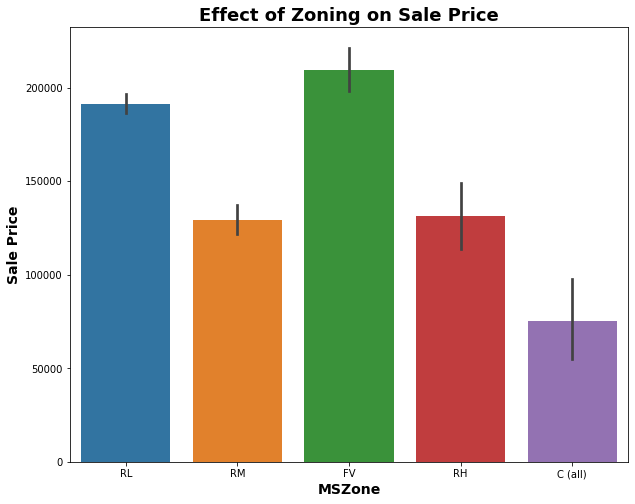

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(df['MSZoning'], df['SalePrice'])
plt.title('Effect of Zoning on Sale Price',fontsize=18,fontweight ='bold')
plt.xlabel('MSZone', fontsize=14,fontweight='bold')
plt.ylabel('Sale Price', fontsize=14,fontweight='bold')
plt.show()

In [ ]:
from collections import Counter
Counter(df['MSZoning'])

Counter({'RL': 928, 'RM': 163, 'FV': 52, 'RH': 16, 'C (all)': 9})

* *We can clearly see the effect of zones on sale price*

* **Floating Village Residential** *are less in number but having more pricing than any other zones, means* **FV zone are costlier than RL which are in majority**

**(c) Effect of Lot configration on Pricing**

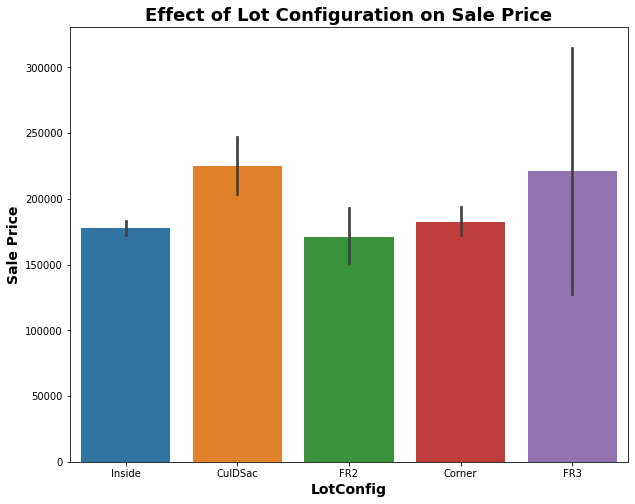

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(df['LotConfig'], df['SalePrice'])
plt.title('Effect of Lot Configuration on Sale Price',fontsize=18,fontweight ='bold')
plt.xlabel('LotConfig', fontsize=14,fontweight='bold')
plt.ylabel('Sale Price', fontsize=14,fontweight='bold')
plt.show()

In [ ]:
from collections import Counter
Counter(df['LotConfig'])

Counter({'Inside': 842, 'CulDSac': 69, 'FR2': 33, 'Corner': 222, 'FR3': 2})

* *Instead of presence of 70% Inside lot, total sale price of inside lot houses is least in the lot*

* *It implies that* **Inside lot houses** are the **cheapest** *among all other Lot configuration*

* **FR3 - Frontage on 3 sides of property** *are the costliest among all the Lot configuration*

**(d) Effect of Building type and Overall quality on Pricing**

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

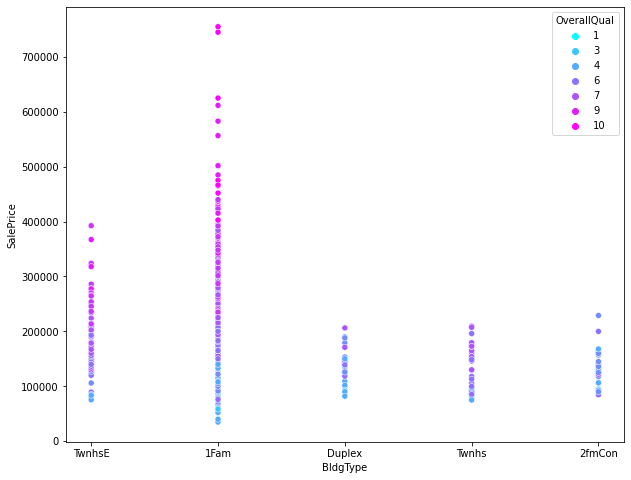

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='BldgType',y='SalePrice',hue='OverallQual',palette='cool',data=df)

* *As seen above, around 85% building in our dataset is 1Fam(Single Family Detached)*

* *It can be seen* **increase in overall quality of house increase the sale price of the house**

* *The overall quality of house is higher in 1Fam bulding type*

**(e) Effect of Floor Area and Roof Style on Pricing**

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

GrLivArea: Above grade (ground) living area square feet

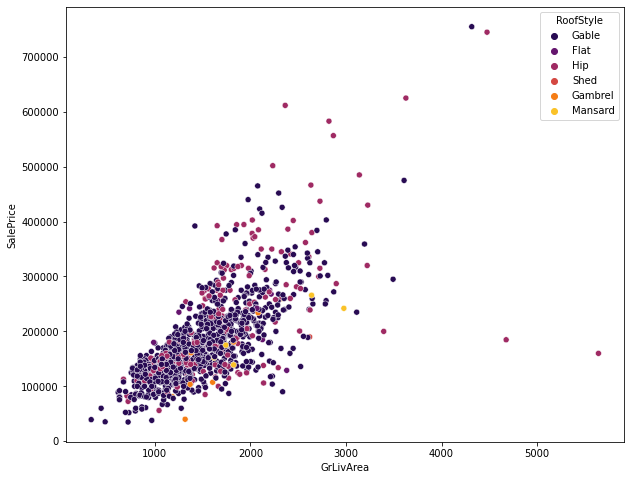

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='GrLivArea',y='SalePrice',hue='RoofStyle',palette='inferno',data=df)

* *Clearly, a positive linear relationship can be seen between floor area and sale price of the house*

* *As total **floor area increases** the **sale price** also get **increases**

* *For **large floor area** construction, Hip style Roof is used and invariably **high cost** properties mostly comes up with* **Hip Style Roof**

**(f) Effect of Exterior Quality on Pricing**

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

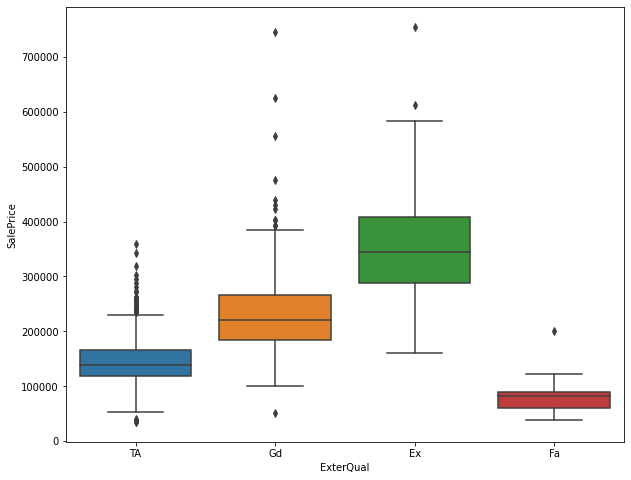

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['SalePrice'], x=df['ExterQual'])

* *As seen above in the countplot, around **60% of house properties** come with **Average Exterior quality** and all of them below 400000*

* *Very few House Properties comes with Excellent Exterior Quality*

* **Costiler** *house properties come with **Good & Excellent exterior** quality*

**(g) Effect of Foundation on Pricing**

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Concrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		

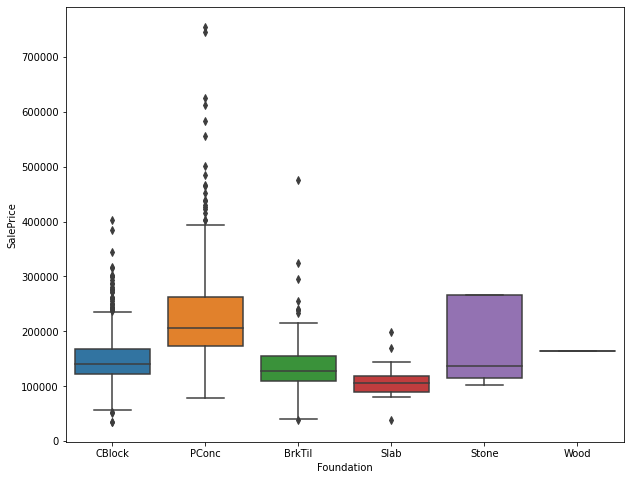

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['SalePrice'], x=df['Foundation'])

In [ ]:
from collections import Counter
Counter(df['Foundation'])

Counter({'CBlock': 516,
         'PConc': 513,
         'BrkTil': 112,
         'Slab': 21,
         'Stone': 5,
         'Wood': 1})

* **Poured Concrete** *houses are costlier than any other type of house*

**(h) Effect of Property Age on Pricing**

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

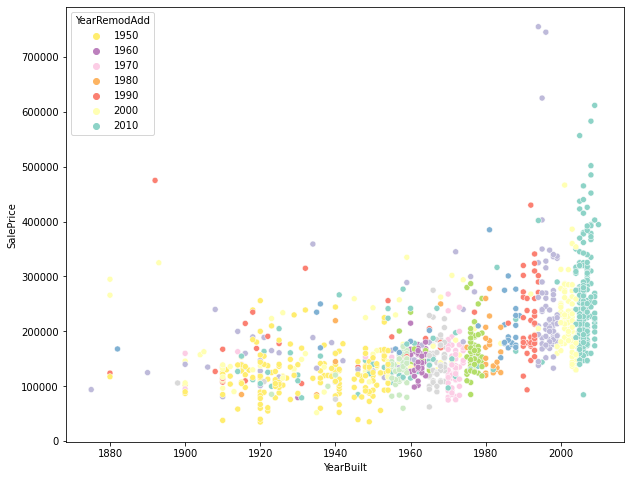

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='YearBuilt',y='SalePrice',hue = 'YearRemodAdd', palette='Set3_r',data=df)

*Clearly seen that as the property gets **older** its **Sales Price** depriciates*

**(i) Effect of Garage age and Garage Finish on Pricing**

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

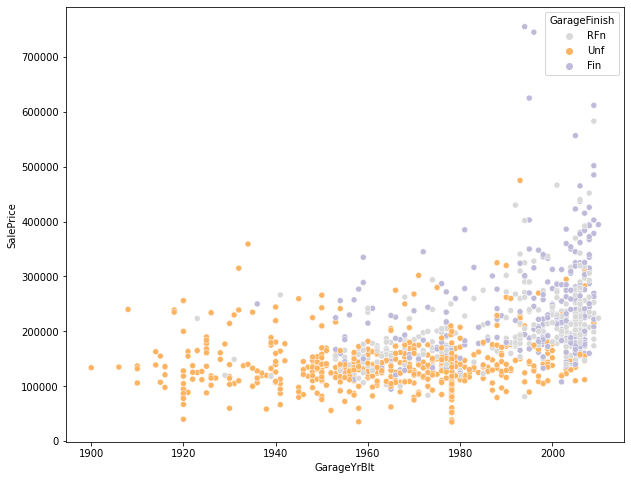

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='GarageYrBlt',y='SalePrice',hue = 'GarageFinish', palette='Set3_r',data=df)

* **Older the Garage age**, **less is the Price** *of property*

* *Finished Garage are costlier than Unfinished Garage*

**(j) Effect of Sale Condition on Pricing**

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

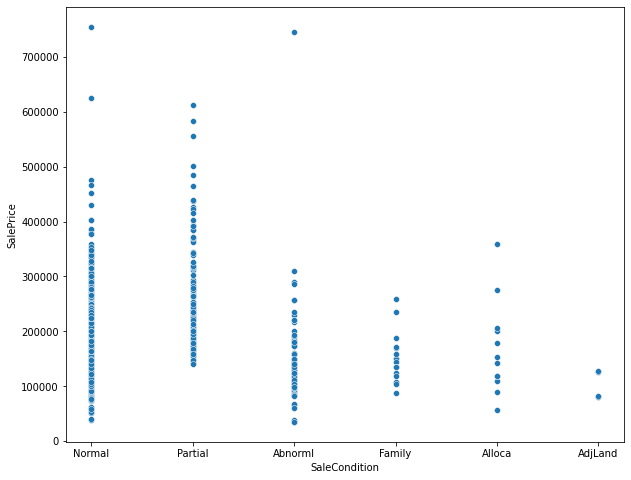

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='SaleCondition',y='SalePrice', palette='icefire_r',data=df)

* *Sale condition like **Abnorml, Family, Alloca and AdjLand** has sale price below 300000*

* **Normal and Partial** *sales condition were mostly prefereed and have better pricing than others*

* *We can observe maximum **Sale Price** with Normal Slaes condition*

**(k) Effect of Kitchen Quality on Pricing**

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

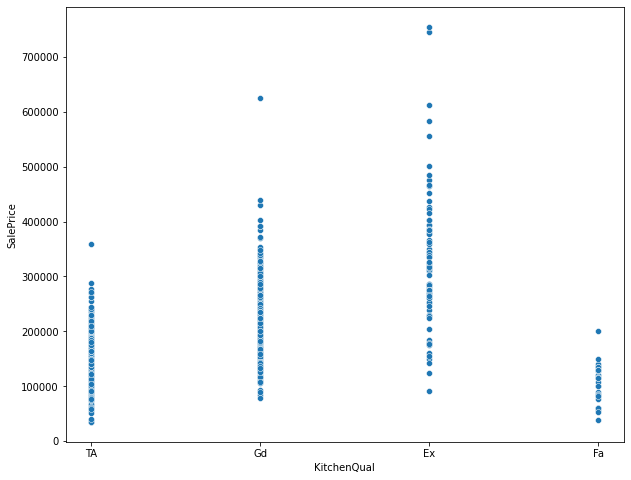

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='KitchenQual',y='SalePrice', palette='BrBG',data=df)

**Excellent** *quality kitchens are costliest and Good and Excellent kitchens are mostly preferred one*

**(l) Effect of Basement on Pricing**

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

TotalBsmtSF: Total square feet of basement area

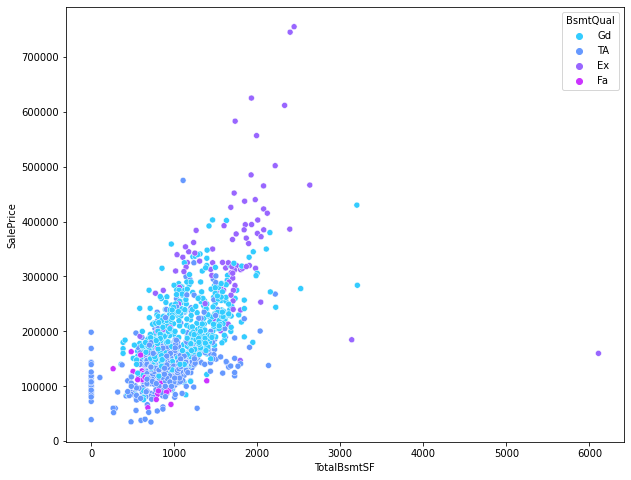

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',hue = 'BsmtQual', palette='cool',data=df)

* *We can observe Positive relationship between basement area and Sale price*

* *Increase in quality always increases the Price of the house*

* *Both **Basement area** and **Basement quality** increases the price of any house*

# **FEATURE ENGINEERING**

**Outlier Detection and Removal**

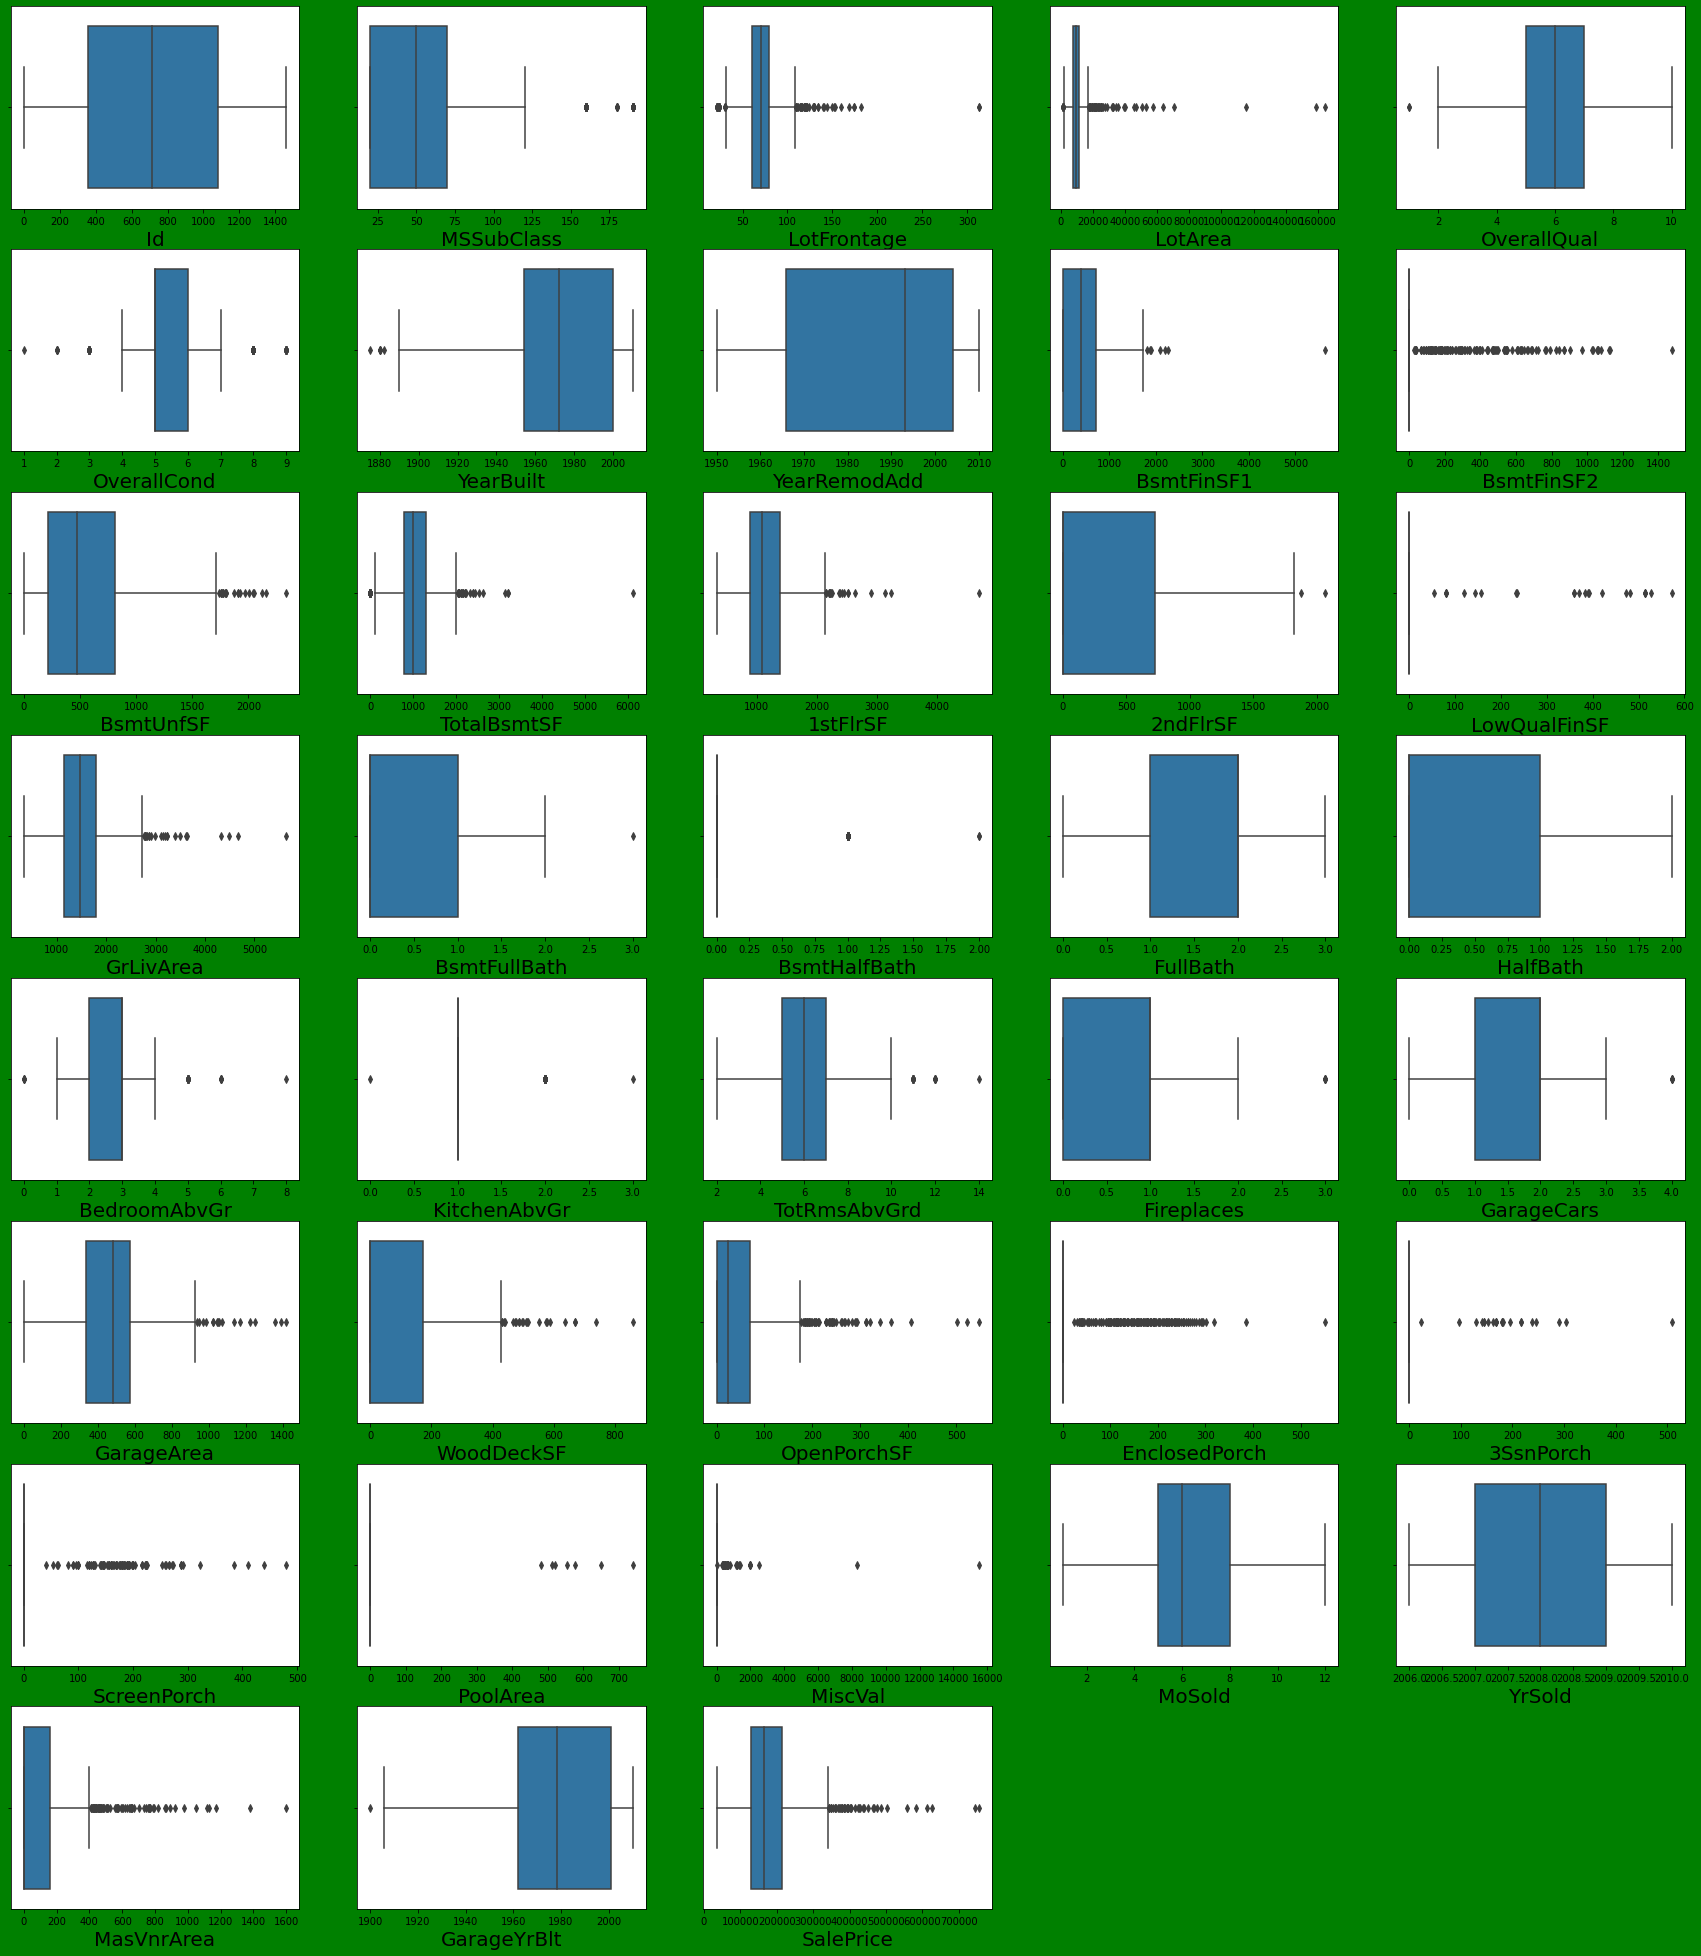

In [37]:
# CHECKING OUTLIERS FOR NUMERICAL VARIABLES
plt.figure(figsize=(30,35),facecolor='g')
plotnumber=1
for column in num:
    if plotnumber<=38:
        ax = plt.subplot(8,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* *Outliers are present in the given dataset but these data are realistic in nature so it will be difficult to afford data loss**

* *Hence, we wil keep the outliers for further investigation*

# **ENCODING THE CATEGORICAL VARIABLES**

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

**1. Training Dataset**

In [39]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

**2. Test Dataset**

In [40]:
for i in df_test.columns:
    if df_test[i].dtypes == "object":
        df_test[i] = le.fit_transform(df_test[i].values.reshape(-1,1))

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.0,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000
1,889,20,3,95.0,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000
2,793,60,3,92.0,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,110,20,3,105.0,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000
4,422,20,3,70.0,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000


In [42]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.0,14157,1,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,5,2
1,1018,120,2,65.0,5814,1,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0
2,929,20,2,65.0,11838,1,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,5,2
3,1148,70,2,75.0,12000,1,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,5,2
4,1227,60,2,86.0,14598,1,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,5,2


In [43]:
df.shape

(1168, 77)

In [44]:
df_test.shape

(292, 76)

*Test Dataset contains **76 columns** and one column which is **absent** is **Sale Price** (target variable)*

# **FEATURE SELECTION USING SELECTKBEST**

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

In [46]:
# Sepearting features and target variable in training dataset
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [67]:
best_features = SelectKBest(score_func = f_classif,k=17)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)

features_score = pd.concat([df_columns, df_scores], axis=1)

features_score.columns = ['Feature_Name','Score']

features_score.nlargest(17,columns ='Score').Feature_Name

16     OverallQual
71         MiscVal
26       ExterQual
45       GrLivArea
29        BsmtQual
52     KitchenQual
60      GarageCars
48        FullBath
61      GarageArea
59    GarageFinish
18       YearBuilt
42        1stFlrSF
37     TotalBsmtSF
25      MasVnrArea
5           Street
4          LotArea
19    YearRemodAdd
Name: Feature_Name, dtype: object

**These are the top 17 variables which we will use for Model bulding for predicting the sales price**

In [68]:
X_new  = df[['OverallQual','MiscVal','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath','GarageArea','GarageFinish',
             'YearBuilt','1stFlrSF','TotalBsmtSF','MasVnrArea','Street','LotArea','YearRemodAdd']]

**Similarly for test dataset, these variables are selected**

In [58]:
X_new_t  = df_test[['OverallQual','MiscVal','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath','GarageArea','GarageFinish',
             'YearBuilt','1stFlrSF','TotalBsmtSF','MasVnrArea','Street','LotArea','YearRemodAdd']]

# **Scaling using Standard Scaler**

**1.Training dataset**

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_new)

**2. Test Dataset**

In [59]:
X_scaler_t = scaler.fit_transform(X_new_t)

# **MODEL BUILDING - SALE PRICE PREDICTION (REGRESSION)**

In [84]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

**BEST RANDOM STATE**

In [70]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
    
    lr = LinearRegression()
    
    lr.fit(X_train,y_train)
    
    pred_lr = lr.predict(X_test)
   
    score_lr = r2_score(y_test,pred_lr)
     
    
    if score_lr>maxR2score:
   
        maxR2score = score_lr
              
        maxRS = i
print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

Maximum R2 Score: 0.8930220963701831 at random state  181


**Train test split using best random state**

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=181)

**Model 1 . LINEAR REGRESSION**

In [72]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("Training accuracy:",score_train*100)

print("Testing accuracy:",score_test*100)

cv_score = cross_val_score(lr,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean} and accuracy score for training is {score_train} and accuracy for testing is {score_test}")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

Training accuracy: 77.00248136219118
Testing accuracy: 89.30220963701831
At cross fold 5, the cv score is 0.7623186441964647 and accuracy score for training is 0.7700248136219118 and accuracy for testing is 0.8930220963701831
Root mean squared Error: 25056.306496302997


**LASSO REGULARIZATION**

In [73]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)

lasscv.fit(X_train,y_train)

#Best alpha parameter
alpha = lasscv.alpha_

lasso_reg =Lasso(alpha)

lasso_reg.fit(X_train,y_train)

pred_test = lasso_reg.predict(X_test)

print(lasso_reg.score(X_test,y_test)*100)

89.28274013107188


*The test score for Linear regression and after regularization is almost same*

**Model 2 - KNN REGRESSOR**

In [74]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====K Neighbors Regressor=====")

print("R square score for training dataset for K Neighbors regressor: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

=====K Neighbors Regressor=====
R square score for training dataset for K Neighbors regressor:  0.8265885156513387
R square score for test dataset for K Neighbors Regressor:  0.8673764489856366
Cross val score for K Neighbors Regresor: 75.66410712097709
Root mean squared Error: 27898.466841605055


**TUNING PARAMETERS FOR KNN REGRESSOR**

In [75]:
params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


In [76]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  0.9999857911694738
R square score for test dataset for K Neighbors Regressor after tuning:  0.8674341481420632
Cross val score for K Neighbors Regresor after tuning: 77.22837905982261
Root mean squared Error for K Neighbors Regressor after tuning: 27892.397432706788


**Model 3 - RANDOM FOREST REGRESSOR**

In [77]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====RANDOM FOREST REGRESSOR=====")

print("Training accuracy for Random Forest model:",score_train*100)

print("Testing accuracy for Random Forest model:",score_test*100)

cv_score = cross_val_score(rf,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest Regressor:",rmse)


=====RANDOM FOREST REGRESSOR=====
Training accuracy for Random Forest model: 97.06715526733156
Testing accuracy for Random Forest model: 90.3525523252906
At cross fold 5, the cv score is 82.25025469241304 
Root mean squared Error for Random Forest Regressor: 23794.480488415582


**TUNING PARAMETERS FOR RANDOM FOREST REGRESSOR**

In [78]:
params_rf = {'min_samples_split':(2,3,4,5),
             'min_samples_leaf' :(2,3,4),             
             'max_depth':(10,15,20)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [79]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("=====After tuning parameters of Random Forest=====")

print("R2 score for Random Forest Model after tuning:",rfs*100)

rf_score = cross_val_score(rf,X_scaler,y,cv=5)

rfc = rf_score.mean()

print("Cross val score for Random Forest model after tuning:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model after tuning:",rmse)

=====After tuning parameters of Random Forest=====
R2 score for Random Forest Model after tuning: 89.64291334570976
Cross val score for Random Forest model after tuning: 81.29239989830059
Root mean squared Error for Random Forest model after tuning: 24654.080870307425


**Model 4 - ADA BOOST REGRESSOR**

In [80]:
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)


=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  0.8495414783778362
R square score for test dataset for Ada Boost Regressor:  0.840759786545021
Cross val score for Ada Boost Regresor: 75.12024724636987
Root mean squared Error for ada boost Regressor: 30570.066736720488


**Tuning Parameters for Ada Boost Regressor**

In [81]:
params_ada = {'n_estimators': [49,51,60],
          'learning_rate':[0.90,0.85,0.30] }

grd_ada = GridSearchCV(ada,params_ada)

grd_ada.fit(X_train,y_train)

print(grd_ada.best_params_)

{'learning_rate': 0.85, 'n_estimators': 51}


In [82]:
ada = grd_ada.best_estimator_

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====ADA BOOST REGRESSOR=====")

print("R square score for training dataset for Ada Boost regressor: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor:",rmse)


=====ADA BOOST REGRESSOR=====
R square score for training dataset for Ada Boost regressor:  0.8480165126110351
R square score for test dataset for Ada Boost Regressor:  0.8462991938513107
Cross val score for Ada Boost Regresor: 75.16695824378645
Root mean squared Error for ada boost Regressor: 30033.647828339337


**The result looks much better with Ada Boost Model because  there is minimum difference between training and test accuracy and better cross validation score**

**Model 5 - SUPPORT VECTOR REGRESSOR**

In [83]:
svr = SVR()

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR: ", acc_test)

svr_score = cross_val_score(svr,X_scaler,y,cv=5)

svr_m = svr_score.mean()

print("Cross val score for SVR:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR:",rmse)

R square score for training dataset for SVR:  -0.050931417533669476
R square score for test dataset for SVR:  -0.051828843869095254
Cross val score for SVR: -6.063551569263259
Root mean squared Error for SVR: 78567.43037521666


**The output values doesn't look at all good, better to go for other model**

**Model 6 - Extreme Gradient Boosting Regressor**

In [85]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGBoosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[08:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGBoosting REGRESSOR=====
Training accuracy for XGradient Boost model: 94.48432637782345
Testing accuracy for XGradient Boost model: 91.23401084499494
[08:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 82.70550297403301 
Root mean squared Error for XG

**This model gives the best result for the given dataset**

*As we get highest **test accuracy as 91.23%** and* **training accuracy as 94.48%**

*Cross validation scores is also looking best among other models as 82.7%*

**Tuning parameters for XGB**

In [86]:
params_xgb = {'max_depth':[3,4,5,6],
              'learning_rate':(0.01,0.001,0.1),
              'min_child_weight':(0,1,2),
              'max_delta_step':(0,1,2)
              }

grd_xgb = GridSearchCV(xgb,params_xgb)

grd_xgb.fit(X_train,y_train)

print(grd_xgb.best_params_)

[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [87]:
xgb = grd_xgb.best_estimator_

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGradient Boosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)

[08:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
=====XGradient Boosting REGRESSOR=====
Training accuracy for XGradient Boost model: 94.48432637782345
Testing accuracy for XGradient Boost model: 91.23401084499494
[08:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
At cross fold 5, the cv score is 82.70550297403301 
Root mean squared Erro

#**SAVING THE MODEL**

In [89]:
import pickle
filename = 'Housing_price_prediction_reg.pkl'
pickle.dump(xgb,open(filename,'wb'))

#**Prediction of test dataset using saved model**

In [91]:
loaded_model = pickle.load(open('Housing_price_prediction_reg.pkl','rb'))
result = loaded_model.predict(X_scaler_t)
result

[09:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([359088.16 , 216534.64 , 264632.22 , 164540.06 , 210901.03 ,
        74988.375, 133713.77 , 258797.19 , 222590.7  , 180083.66 ,
        74969.055, 135894.73 , 138522.45 , 182932.67 , 326169.22 ,
        95205.18 , 116916.48 , 121287.27 , 178572.08 , 195746.14 ,
       156529.27 , 143714.48 , 141863.42 ,  80643.83 , 107905.625,
       125774.24 , 181764.08 , 140025.22 , 172005.92 , 111921.555,
       159667.08 , 191980.75 , 236137.33 , 161715.2  , 118897.15 ,
       174021.31 , 187866.39 ,  99758.7  , 153415.69 , 150654.38 ,
       106202.9  , 346065.06 , 201969.47 , 189848.98 , 139155.88 ,
       131491.97 , 133689.2  , 114610.07 , 199956.62 , 317575.53 ,
       141246.77 , 196143.94 , 111615.06 , 101348.375, 305743.47 ,
       108630.6  , 139772.3  , 190002.72 , 114162.914, 264954.62 ,
        84555.28 , 152274.78 , 123137.36 , 145317.6  , 200804.36 ,
        96326.72 , 152477.88 , 221927.98 , 140879.9  , 167581.86 ,
       351573.62 , 155608.39 , 178183.33 , 178764.06 , 135420.

In [92]:
SalePrice_test = pd.DataFrame()
SalePrice_test['SalePrice']= result
SalePrice_test.head()

,SalePrice
0,359088.156250
1,216534.640625
2,264632.218750
3,164540.062500
4,210901.031250


In [93]:
Final_test_data = pd.concat([df_test, SalePrice_test], axis=1)
Final_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,2,86.0,14157,1,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,5,2,359088.156250
1,1018,120,2,65.0,5814,1,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0,216534.640625
2,929,20,2,65.0,11838,1,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,5,2,264632.218750
3,1148,70,2,75.0,12000,1,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,5,2,164540.062500
4,1227,60,2,86.0,14598,1,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,5,2,210901.031250
